In [1]:
!pip install tensorflow-gpu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# declare thr dependent and independent varialbles

x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
# example
geography = pd.get_dummies(x['Geography'])
gender = pd.get_dummies(x['Gender'])

In [9]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [10]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [11]:
geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
x = x.drop(['Geography','Gender'],axis=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
x = pd.concat([x,geography,gender],axis=1)

In [17]:
x                                                                # the last 3 columns are added to the dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
# split the datset into training data & testing data

from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [20]:
# feature scalling

from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()        

x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test) 

In [21]:
x_train.shape

(8000, 11)

In [22]:
x_test.shape

(2000, 11)

In [23]:
y_train.shape

(8000,)

In [24]:
y_test.shape

(2000,)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [26]:
classifier = Sequential()

In [27]:
classifier.add(Dense(units = 11, activation ='relu'))

In [28]:
classifier.add(Dense(units = 7, activation= 'relu'))

In [29]:
classifier.add(Dense(units= 6, activation ='relu'))

In [30]:
classifier.add(Dense(1,activation ='sigmoid'))

In [31]:
classifier.compile(optimizer ='adam',loss ='binary_crossentropy', metrics =['accuracy'])

In [33]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [34]:
# fit

model_history = classifier.fit(x_train,y_train,validation_split =0.33,batch_size =10,epochs =1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5133 - accuracy: 0.7955 - val_loss: 0.4601 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8026 - val_loss: 0.4411 - val_accuracy: 0.8016
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8171 - val_loss: 0.4220 - val_accuracy: 0.8164
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8334 - val_loss: 0.4044 - val_accuracy: 0.8220
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8421 - val_loss: 0.3869 - val_accuracy: 0.8372
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8485 - val_loss: 0.3772 - val_accuracy: 0.8451
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3536 - accuracy: 0.8559 - val_loss: 0.3715 - val_accuracy:

In [39]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

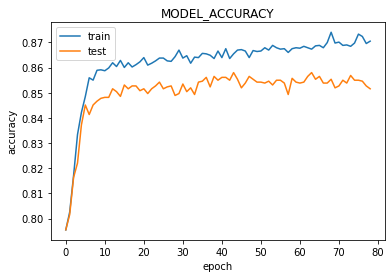

In [40]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('MODEL_ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train','test'], loc ='upper left')
plt.show()

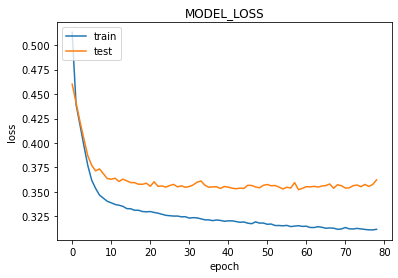

In [41]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('MODEL_LOSS')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','test'], loc ='upper left')
plt.show()

In [42]:
# making the prediction and evaluating the model

# predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [43]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1478,  117],
       [ 168,  237]], dtype=int64)

In [49]:
# calculate the accuracy score

from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test,y_pred)
a_score

0.8575

In [50]:
# get the weights

classifier.get_weights()

[array([[-0.11106614, -0.03287379, -0.08301929, -0.04683862,  0.01534062,
         -0.09258875, -0.02925249, -0.2984573 ,  0.07219093,  0.06858172,
          0.0848473 ],
        [ 1.0856453 ,  0.00145385,  0.8249528 ,  0.12696911,  0.09010351,
          0.6254802 , -0.10465463, -0.20631602, -0.17011301,  0.35805967,
         -0.42873737],
        [-0.2057113 ,  0.03353678,  0.32358247,  0.23664063,  0.10814884,
          0.16657445,  0.22504343,  0.09645167,  0.23464197,  0.12487539,
          0.04602177],
        [-0.22377376,  1.0752664 ,  0.22889714,  0.5470014 , -0.37587222,
         -0.44352356, -0.04720275,  0.5210286 , -0.59931487, -0.11964736,
         -0.36433503],
        [-0.36018798,  0.05350385,  0.2293517 , -0.4060829 ,  0.5936813 ,
         -0.0815591 ,  1.3466725 ,  0.73346615, -0.2580152 ,  0.9568113 ,
         -0.05063929],
        [-0.11304054, -0.04904701,  0.06374895, -0.32213002,  0.33709648,
         -0.14600103, -0.22638753, -0.19981858, -0.0276003 , -0.1778991